## Data Exploration 2
In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
# read in us education data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [7]:
student_performance_df.columns = student_performance_df.columns.str.replace(' ', '_')
student_performance_df.columns = map(str.lower, student_performance_df.columns)

In [8]:
student_performance_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
student_performance_df.shape

(1000, 8)

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [27]:
# find mean score for all subjects for each student
student_performance_df.iloc[:,-3:].mean(axis=1).head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
dtype: float64

In [28]:
# combine gender along side mean grade scores for all subjects aggregated
pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), student_performance_df.gender], axis=1).head()

,0,gender
0,72.666667,female
1,82.333333,female
2,92.666667,female
3,49.333333,male
4,76.333333,male


In [42]:
# aggregate by gender
pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), student_performance_df.gender], axis=1).groupby('gender').mean()

,0
gender,
female,69.569498
male,65.837483


<BarContainer object of 2 artists>

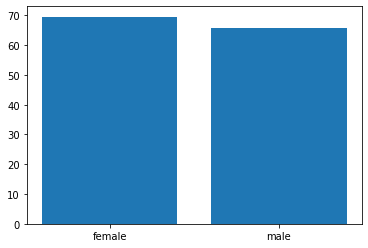

In [44]:
# bar chart to compare sore of female students against ma
plt.bar(pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), student_performance_df.gender], axis=1).groupby('gender').mean().index,
        height=pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), student_performance_df.gender], axis=1).groupby('gender').mean().iloc[:,0])

female students have higher grades than males on average

In [47]:
# combine race/ethnicity along side mean grade scores for all subjects aggregated
pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
           student_performance_df['race/ethnicity']], axis=1).groupby('race/ethnicity').mean()

,0
race/ethnicity,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381


<BarContainer object of 5 artists>

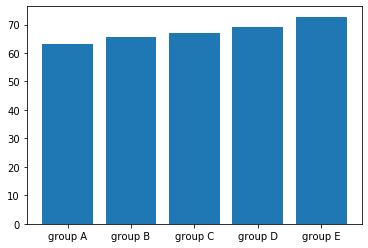

In [60]:
plt.bar(pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df['race/ethnicity']], axis=1).groupby('race/ethnicity').mean().index, \
            height = pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df['race/ethnicity']], axis=1).groupby('race/ethnicity').mean().iloc[:,0])

Group E ethnicity has the highest mean grades, with group A having the lowest scores.

In [10]:
student_performance_df.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

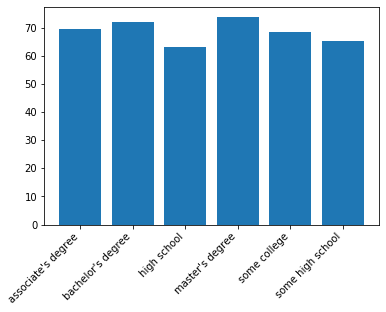

In [74]:
ax = plt.bar(pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.parental_level_of_education], axis=1).groupby(student_performance_df.parental_level_of_education).mean().index, \
            height = pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.parental_level_of_education], axis=1).groupby(student_performance_df.parental_level_of_education).mean().iloc[:,0])
plt.xticks(rotation=45, horizontalalignment='right')

Parents with a masters degree are associated with the students who have the highest mean grades.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


In [75]:
student_performance_df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

<BarContainer object of 2 artists>

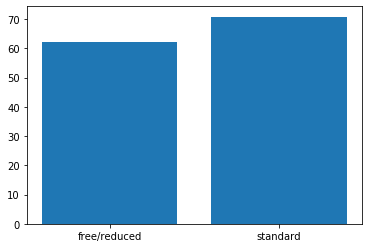

In [76]:
plt.bar(pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.lunch], axis=1).groupby(student_performance_df.lunch).mean().index, \
            height = pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.lunch], axis=1).groupby(student_performance_df.lunch).mean().iloc[:,0])

Students with free/reduced lunches don't do as well as students with standard lunches.  The need for a free/reduced lunch seems to be an indicator that these students don't the resources of other students - which might include extra tutoring help.

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [88]:
# summarize data
pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
     student_performance_df.test_preparation_course], axis=1) \
    .groupby(student_performance_df.test_preparation_course).mean()

,0
test_preparation_course,
completed,72.669460
none,65.038941


In [86]:
# mean difference between students who took prep course and those who didn't
pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
     student_performance_df.test_preparation_course], axis=1) \
    .groupby(student_performance_df.test_preparation_course).mean().iloc[0,0] - \

pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
     student_performance_df.test_preparation_course], axis=1) \
    .groupby(student_performance_df.test_preparation_course).mean().iloc[1,0]

7.630519152787173

<BarContainer object of 2 artists>

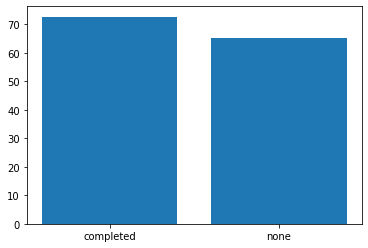

In [89]:
# visualize difference
plt.bar(pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.test_preparation_course], axis=1).groupby(student_performance_df.test_preparation_course).mean().index, \
            height = pd.concat([student_performance_df.iloc[:,-3:].mean(axis=1), 
                   student_performance_df.test_preparation_course], axis=1).groupby(student_performance_df.test_preparation_course).mean().iloc[:,0])

The test preparation course does seem to have an effect on the exam performances.  Students who take the course have higher scores by an average of 7.63 grade points.

### 4. Which 2 exam scores are most correlated with each other?

In [96]:
student_performance_df.iloc[:,-3:].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


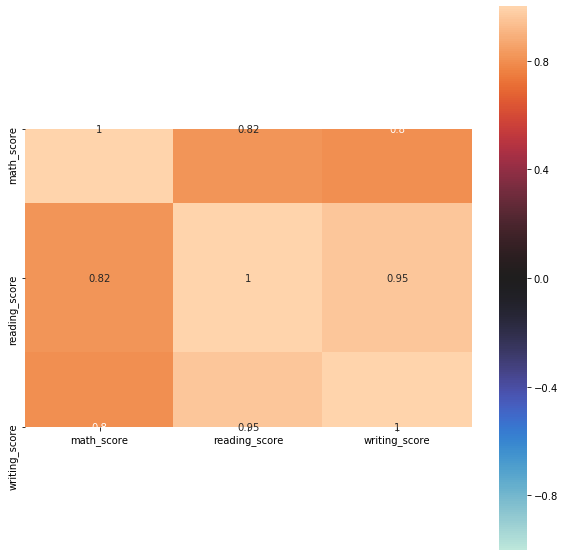

In [113]:
plt.figure(figsize=(10, 10))

sns.heatmap(student_performance_df.iloc[:,-3:].corr(), vmin=-1, vmax=1, center=0, square=True, annot=True);
# plt.title("sss")
# plt.tight_layout

#### <font color=darkorange>Unclear to me why I can't get this heatmap to show up properly.</font>
http://seaborn.pydata.org/generated/seaborn.heatmap.html

Writing and reading scores seem to be the scores most highly correlated with each other.  This makes a lot of sense since there is much more commonality between writing and reading than there is between either writing and math and reading and math.